## Predictive Model for Water Potability

#### Step 1: Import Libraries

### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Load the dataset

In [2]:
data= pd.read_csv(r"C:\Users\BhavanaSoni\Desktop\New_folder\projects\water_potability\data\water_potability.csv", encoding='latin-1')

Notes:
- encoding ='latin-1' specifies that the file should be read using the ISO 8859-1 (Latin-1) encoding, a character encoding standard that supports Western European languages

In [3]:
data.head()

ph     Hardness       Solids  Chloramines     Sulfate  \
0          NaN  204.8904555  20791.31898  7.300211873  368.516441   
1  3.716080075  129.4229205  18630.05786  6.635245884         NaN   
2  8.099124189  224.2362594  19909.54173  9.275883603         NaN   
3  8.316765884  214.3733941  22018.41744  8.059332377  356.886136   
4  9.092223456  181.1015092  17978.98634  6.546599974  310.135738   

  Conductivity Organic_carbon Trihalomethanes    Turbidity  Potability  
0  564.3086542    10.37978308     86.99097046  2.963135381           0  
1  592.8853591    15.18001312     56.32907628  4.500656275           0  
2  418.6062131    16.86863693     66.42009251   3.05593375           0  
3  363.2665162     18.4365245     100.3416744  4.628770537           0  
4  398.4108134    11.55827944     31.99799273  4.075075425           0

### Step 2: Understanding the data

In [4]:
data.shape

(3276, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [6]:
data.describe()

Sulfate   Potability
count  2495.000000  3276.000000
mean    333.775777     0.103175
std      41.416840     0.304233
min     129.000000     0.000000
25%     307.699498     0.000000
50%     333.073546     0.000000
75%     359.950170     0.000000
max     481.030642     1.000000

Note: There is a problem with data that most of data is in object format, we need to convert to numeric format through pd.to_numeric

In [7]:
data = data.apply(pd.to_numeric, errors='coerce')

In [8]:
data.describe()

ph     Hardness        Solids   Chloramines      Sulfate  \
count  2784.000000  3274.000000   3265.000000   3274.000000  2495.000000   
mean      7.080766   196.359915  22015.793088     10.189087   333.775777   
std       1.594605    32.887464   8777.206464    175.472523    41.416840   
min       0.000000    47.432000    320.942611     -4.502117   129.000000   
25%       6.092665   176.844221  15658.086280      6.129569   307.699498   
50%       7.035894   196.928061  20933.512750      7.131929   333.073546   
75%       8.062251   216.671731  27336.962620      8.115665   359.950170   
max      14.000000   323.124000  61227.196010  10047.050500   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3274.000000     3213.000000      3113.000000  3274.000000  3276.000000  
mean     426.206621       50.531962        66.395074     3.966995     0.103175  
std       80.810979     1672.222564        16.177464     0.780551     0.304233  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.763185       12.079207        55.835966     3.439880     0.000000  
50%      421.884968       14.225917        66.621027     3.955122     0.000000  
75%      481.763341       16.563116        77.339918     4.500544     0.000000  
max      753.342620    91456.654130       124.000000     6.739000     1.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2784 non-null   float64
 1   Hardness         3274 non-null   float64
 2   Solids           3265 non-null   float64
 3   Chloramines      3274 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3274 non-null   float64
 6   Organic_carbon   3213 non-null   float64
 7   Trihalomethanes  3113 non-null   float64
 8   Turbidity        3274 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Step 3: Data Cleaning

- Checking Null Values

In [10]:
data.isnull().sum()

ph                 492
Hardness             2
Solids              11
Chloramines          2
Sulfate            781
Conductivity         2
Organic_carbon      63
Trihalomethanes    163
Turbidity            2
Potability           0
dtype: int64

In [11]:
(data.isnull().sum()/len(data))*100

ph                 15.018315
Hardness            0.061050
Solids              0.335775
Chloramines         0.061050
Sulfate            23.840049
Conductivity        0.061050
Organic_carbon      1.923077
Trihalomethanes     4.975580
Turbidity           0.061050
Potability          0.000000
dtype: float64

Note: Since Missing Value is high so we need to handle it.
- Three columns have missing values so we fill with their mean values

In [12]:
data.fillna(data.mean(),inplace=True)

In [13]:
data.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080766  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [14]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
data.duplicated().sum()

0

### Step 4: Data Visualization

C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

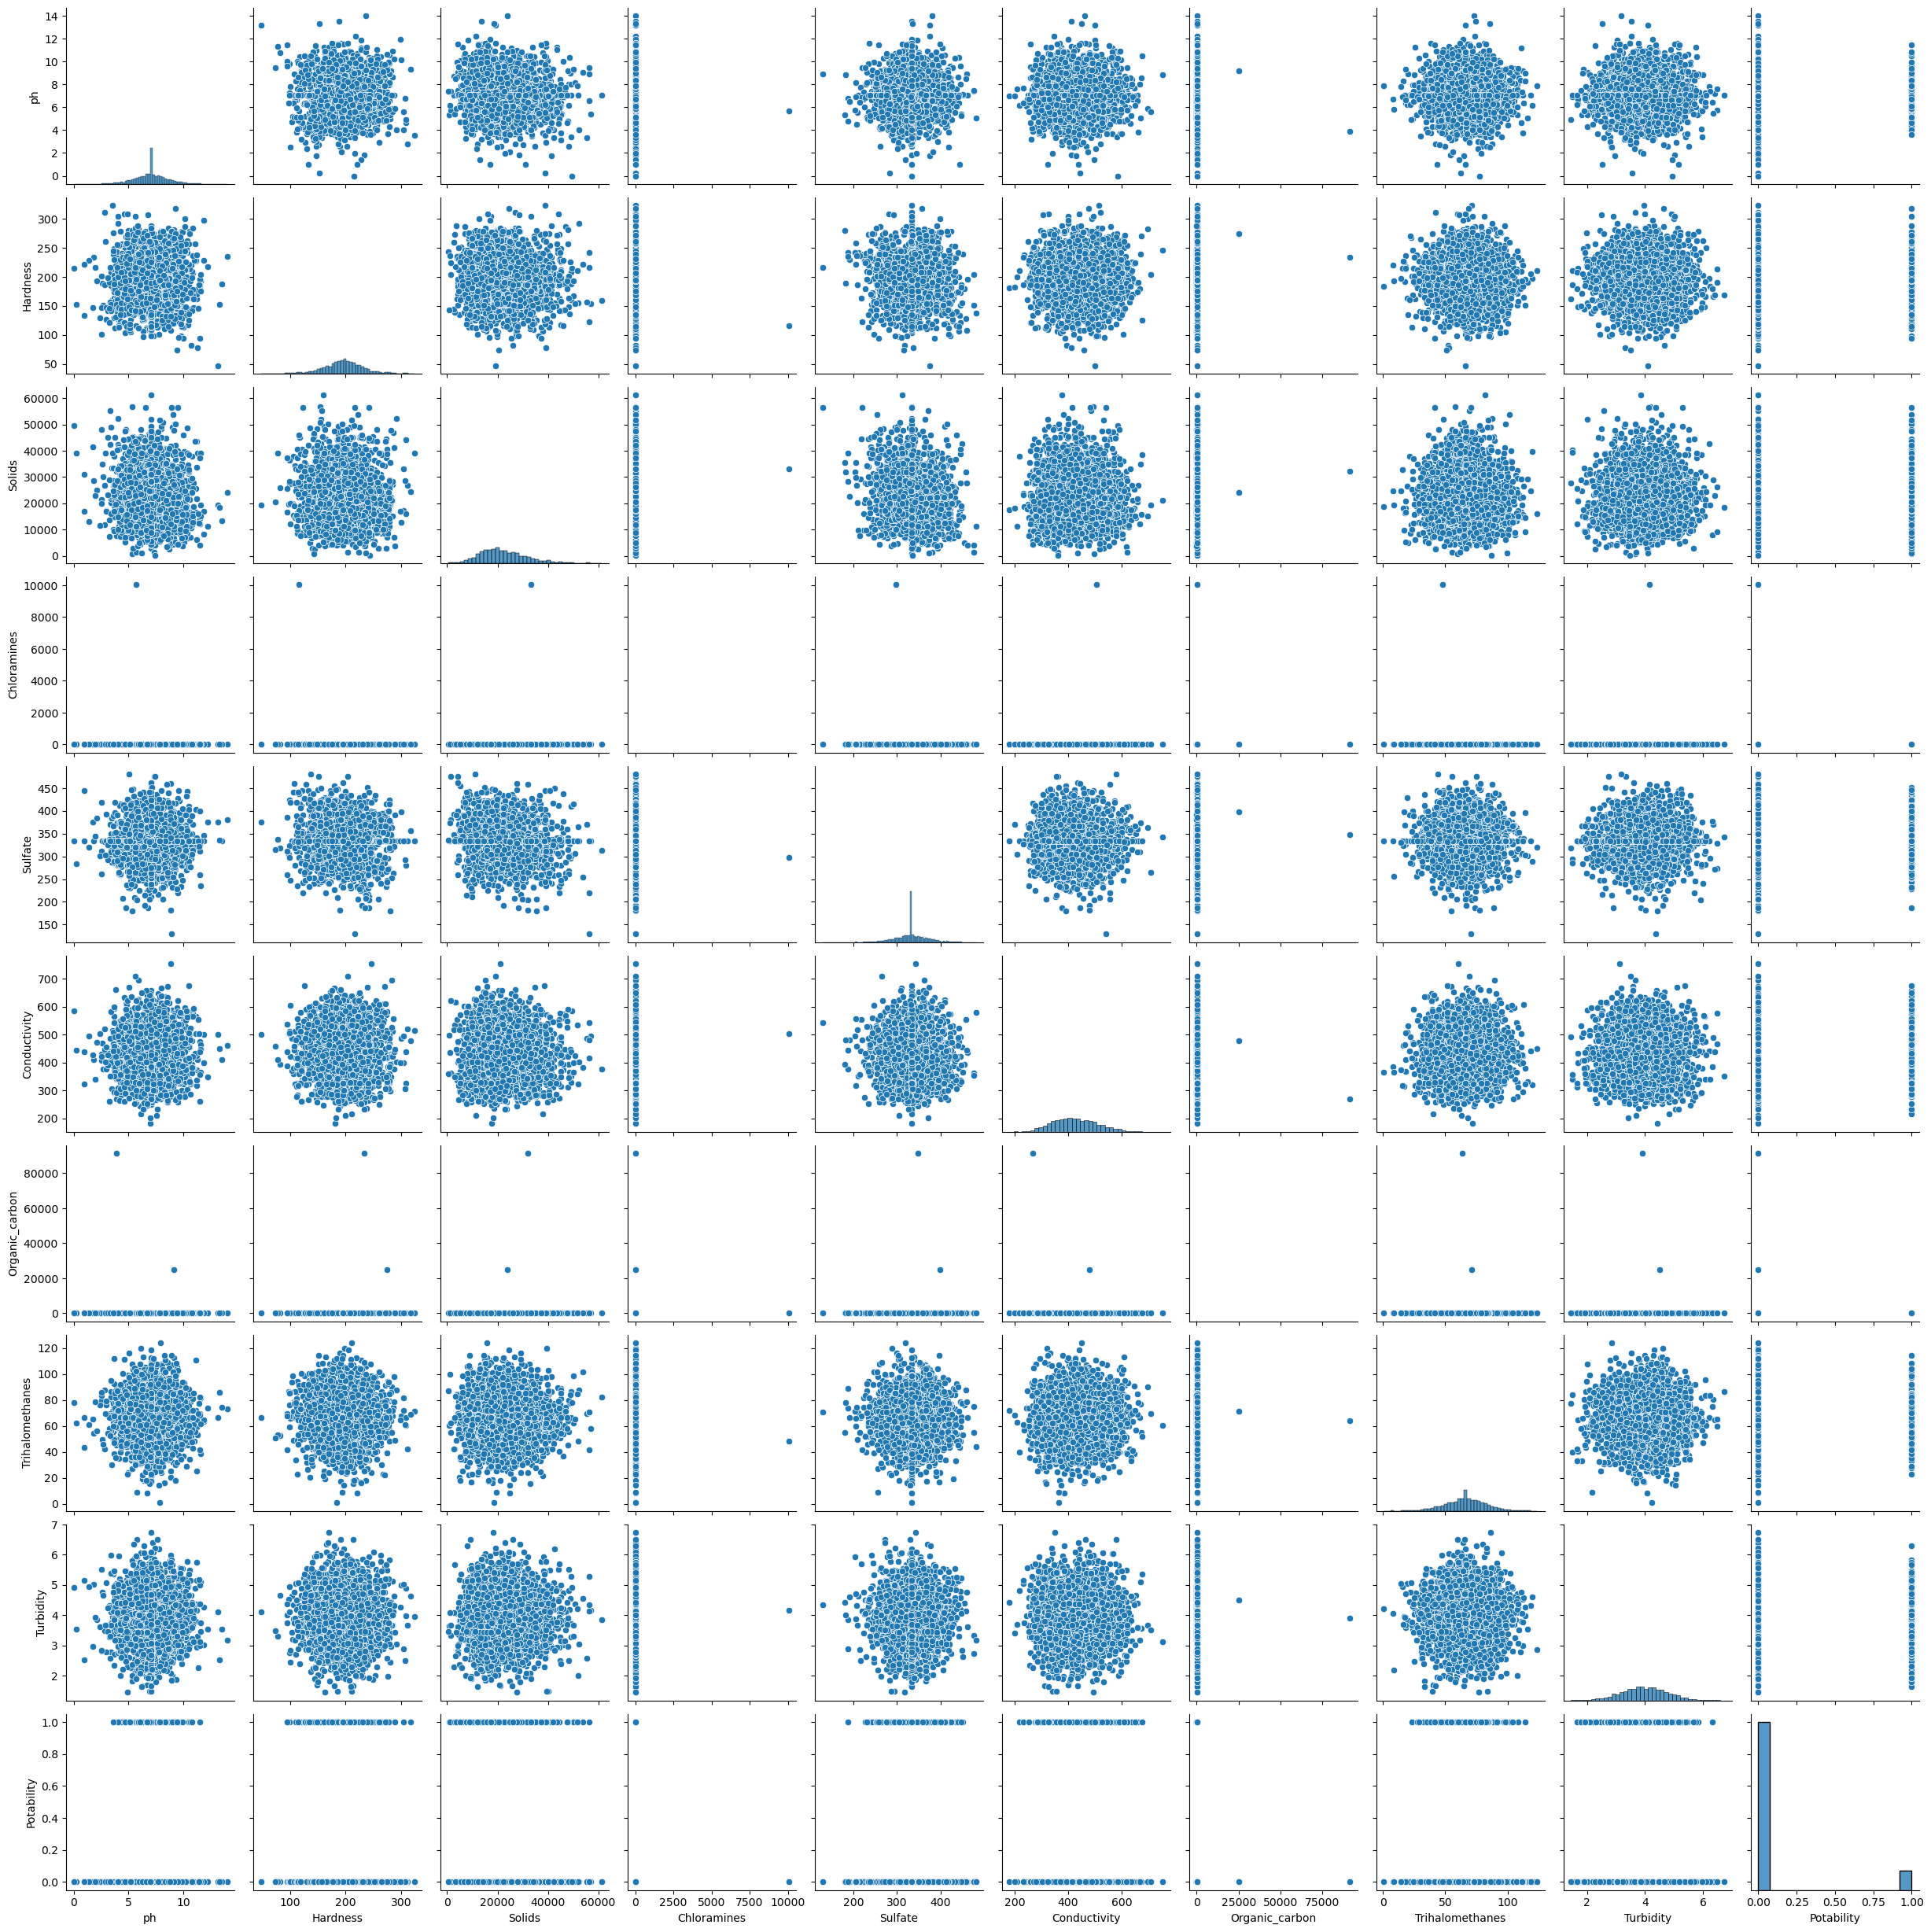

In [16]:
sns.pairplot(data)

In [17]:
data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075642 -0.081794    -0.016630  0.014428   
Hardness         0.075642  1.000000 -0.047393    -0.042807 -0.092782   
Solids          -0.081794 -0.047393  1.000000     0.021737 -0.150287   
Chloramines     -0.016630 -0.042807  0.021737     1.000000 -0.017518   
Sulfate          0.014428 -0.092782 -0.150287    -0.017518  1.000000   
Conductivity     0.017965 -0.023509  0.012596     0.016707 -0.013483   
Organic_carbon  -0.029761  0.029882  0.020608    -0.000019  0.015098   
Trihalomethanes  0.002868 -0.012682 -0.009383    -0.020060 -0.025605   
Turbidity       -0.036235 -0.013752  0.020298     0.004297 -0.009635   
Potability      -0.002382 -0.007354  0.021651    -0.005672  0.018261   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017965       -0.029761         0.002868  -0.036235   
Hardness            -0.023509        0.029882        -0.012682  -0.013752   
Solids               0.012596        0.020608        -0.009383   0.020298   
Chloramines          0.016707       -0.000019        -0.020060   0.004297   
Sulfate             -0.013483        0.015098        -0.025605  -0.009635   
Conductivity         1.000000       -0.029682         0.000414   0.005970   
Organic_carbon      -0.029682        1.000000        -0.001367   0.001794   
Trihalomethanes      0.000414       -0.001367         1.000000  -0.021610   
Turbidity            0.005970        0.001794        -0.021610   1.000000   
Potability           0.014311       -0.007452        -0.020685  -0.016413   

                 Potability  
ph                -0.002382  
Hardness          -0.007354  
Solids             0.021651  
Chloramines       -0.005672  
Sulfate            0.018261  
Conductivity       0.014311  
Organic_carbon    -0.007452  
Trihalomethanes   -0.020685  
Turbidity         -0.016413  
Potability         1.000000

<Axes: >

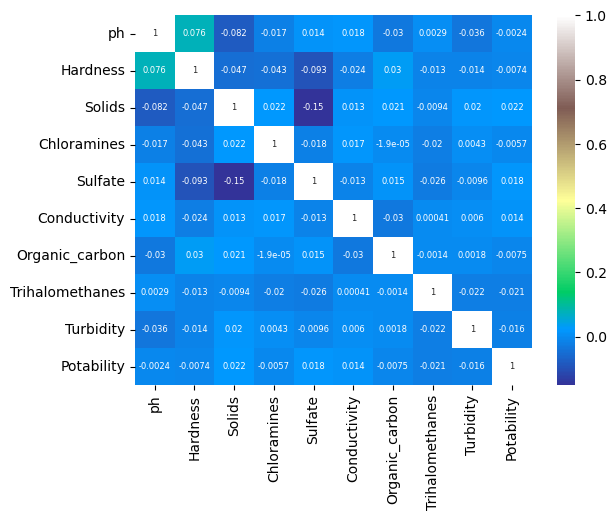

In [18]:
sns.heatmap(data.corr(numeric_only=True), annot=True, annot_kws={'size': 6}, cmap="terrain")

#### Checking Outliers through Boxplot


<Axes: >

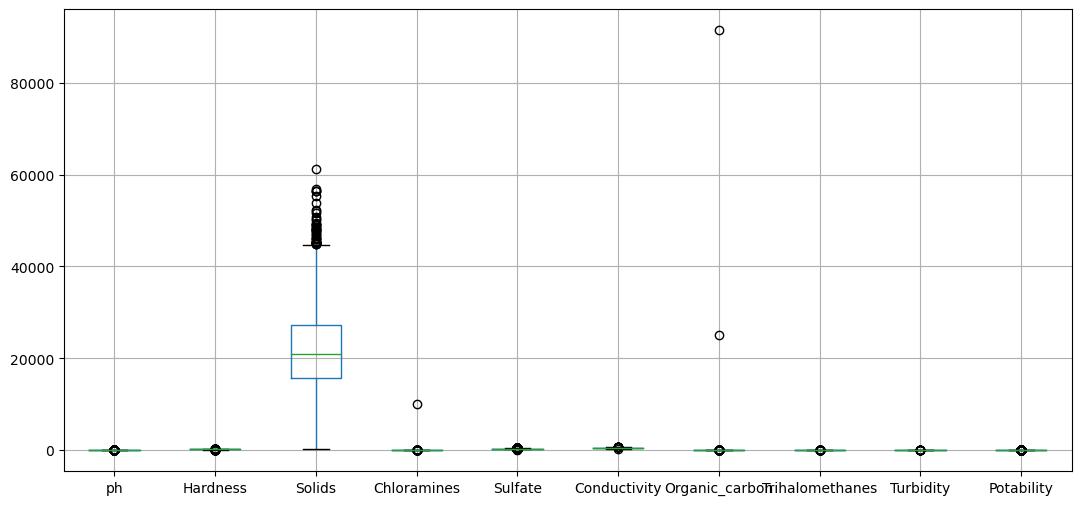

In [19]:
data.boxplot(figsize=(13,6))

In [20]:
data['Solids'].describe()

count     3276.000000
mean     22015.793088
std       8762.453719
min        320.942611
25%      15670.407872
50%      20988.258610
75%      27317.716838
max      61227.196010
Name: Solids, dtype: float64

- Note : Removing the outliers because may be important to decide the quality of water

In [21]:
data.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080766  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [22]:
data.shape

(3276, 10)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Step 5:More EDA

In [24]:
data["Potability"].value_counts()

Potability
0    2938
1     338
Name: count, dtype: int64

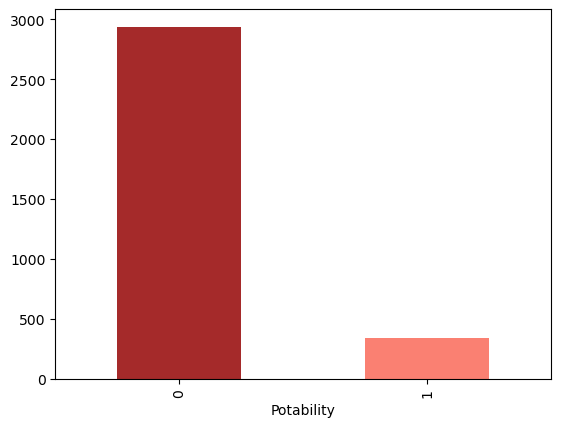

In [25]:
data.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

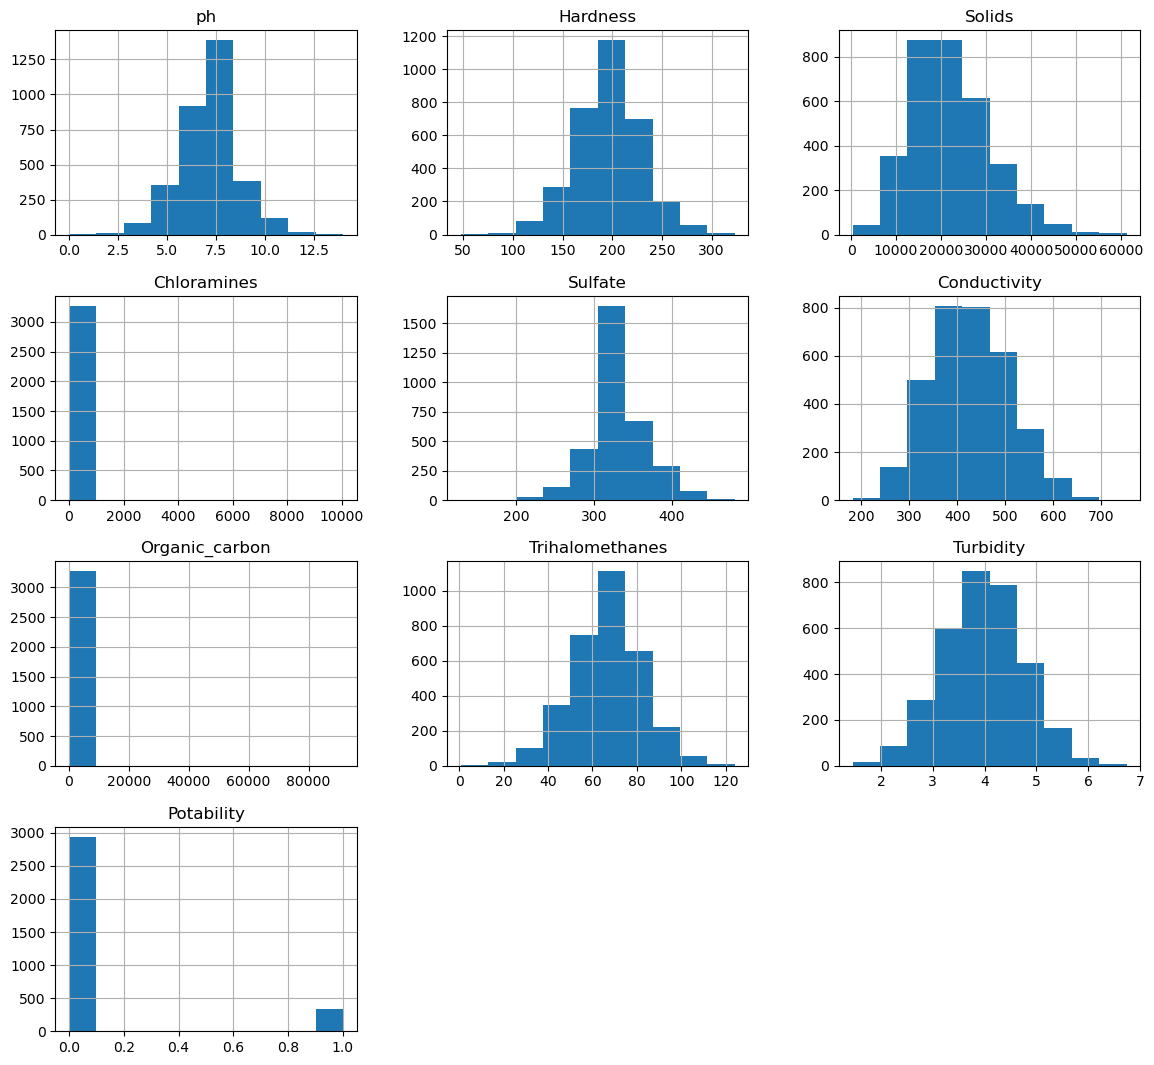

In [26]:
data.hist(figsize=(14,13))
plt.show()

C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you wi

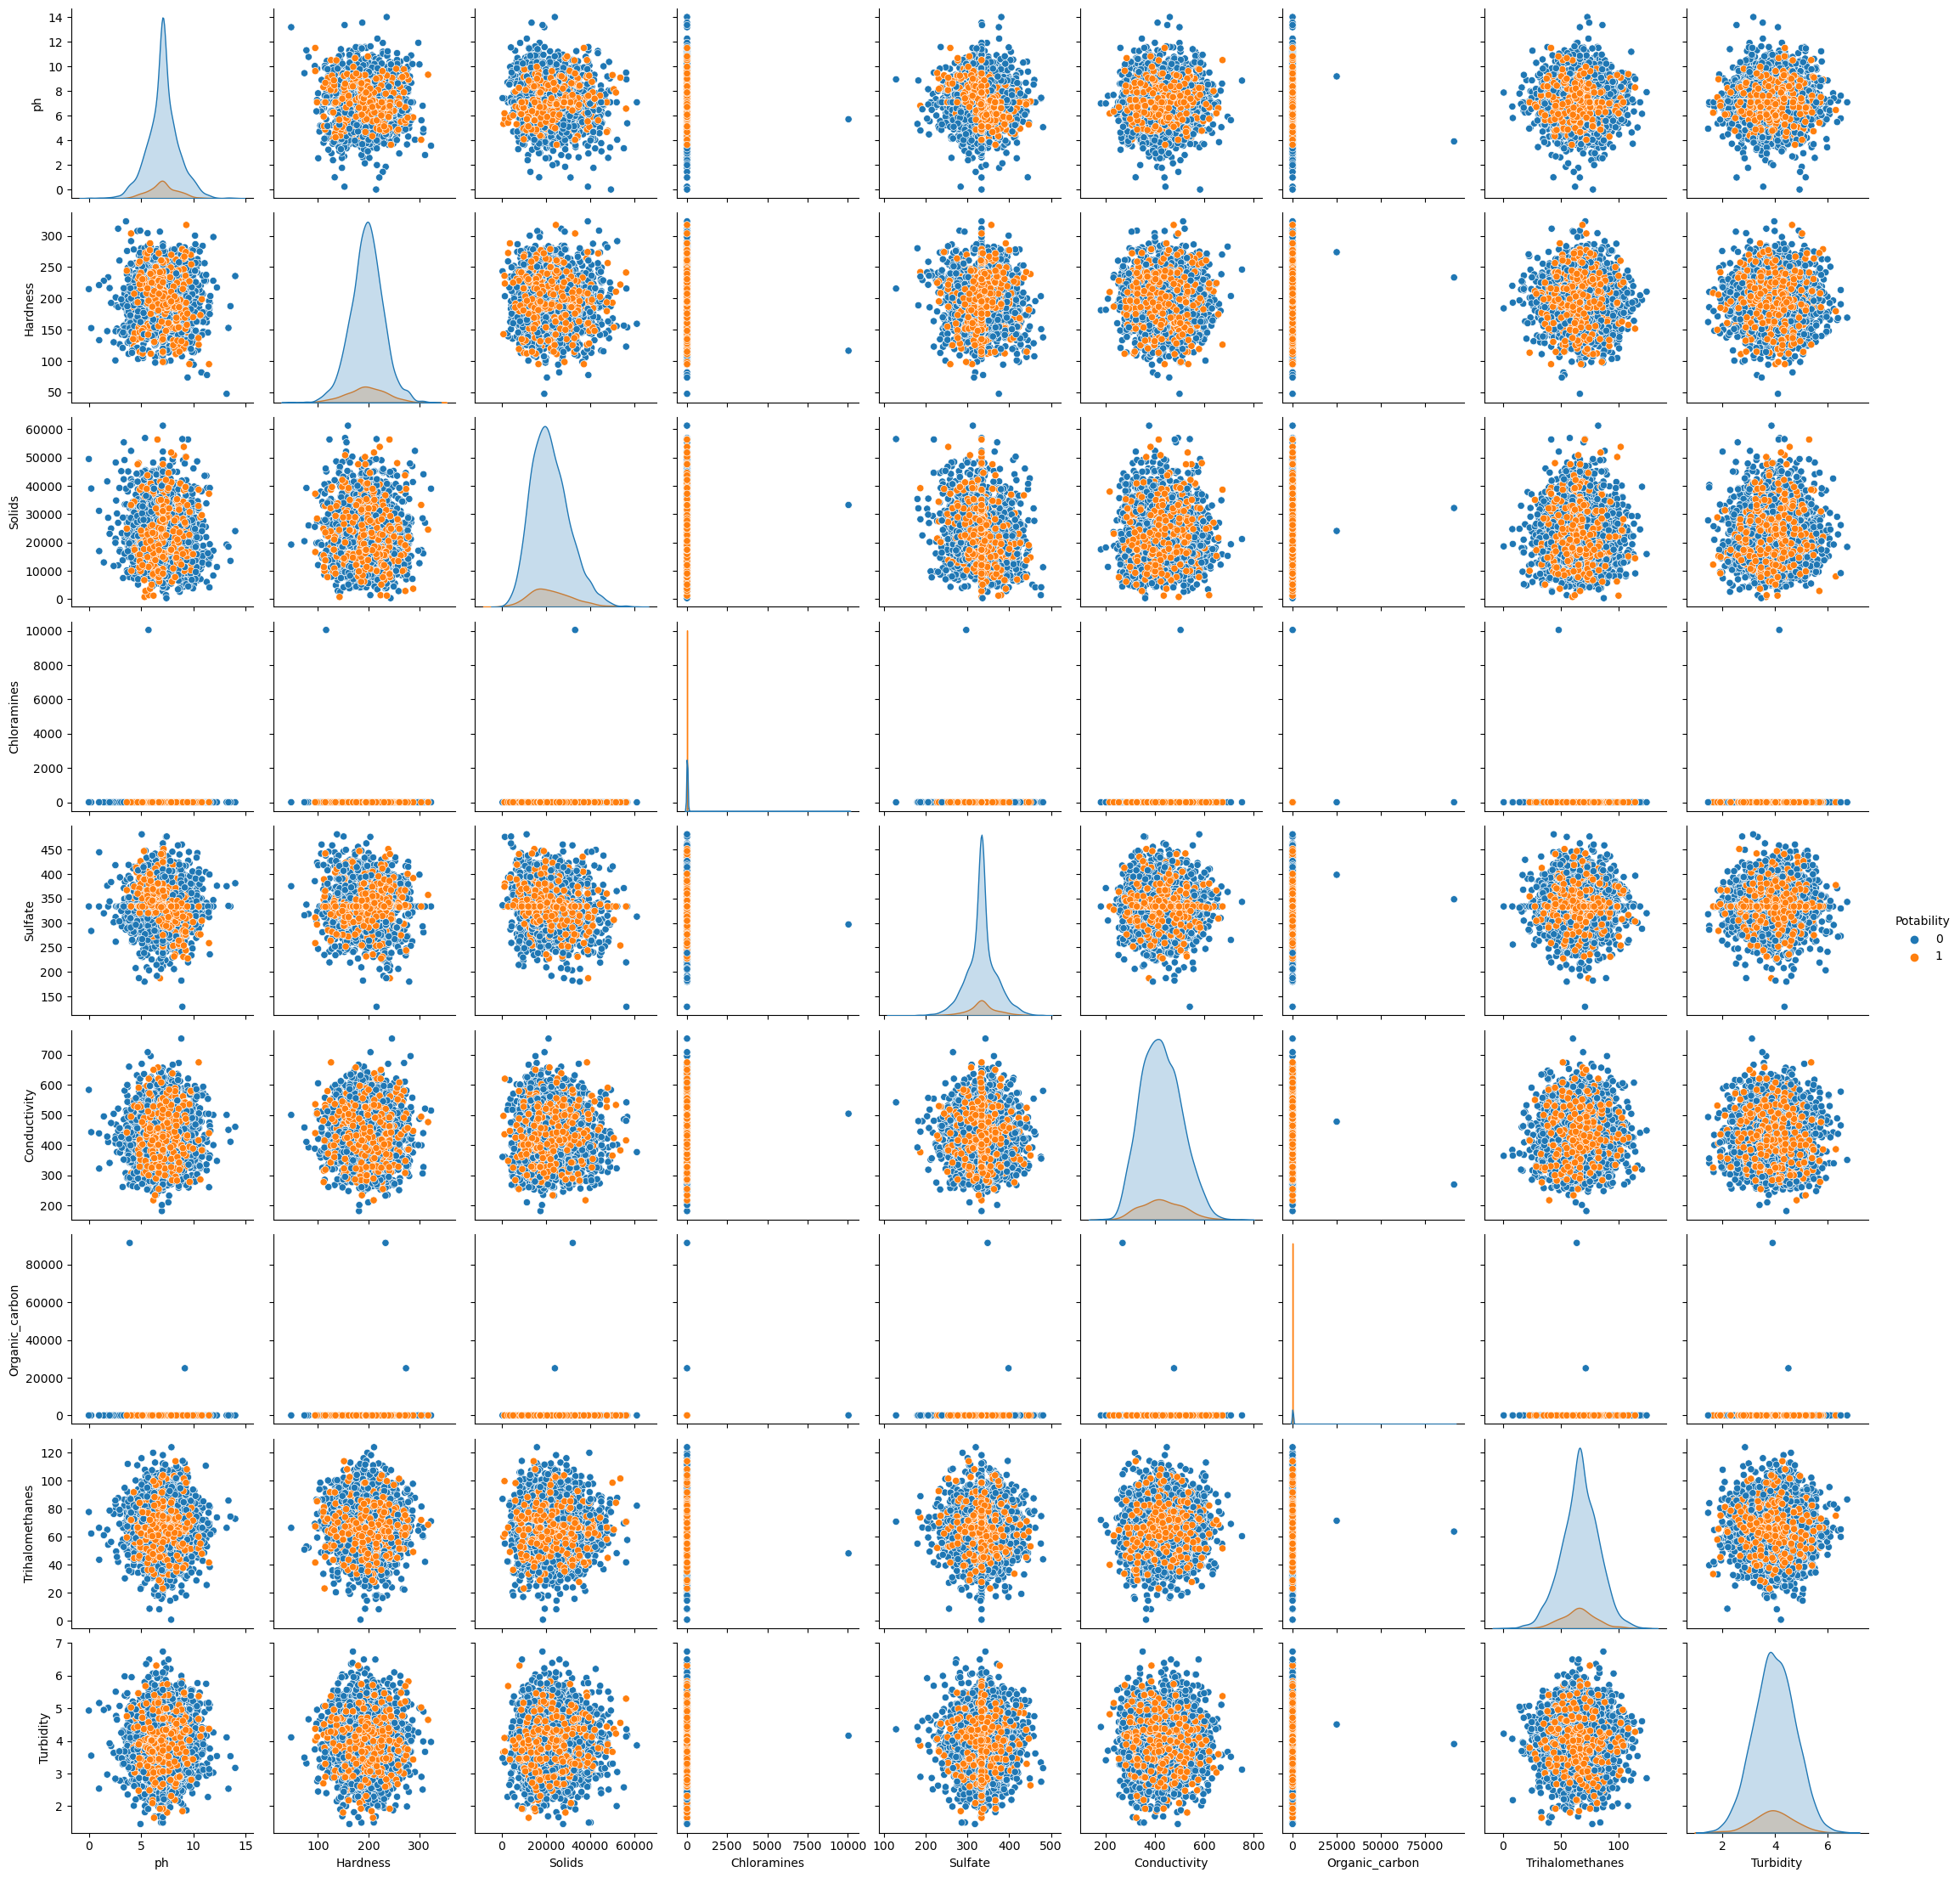

In [27]:
sns.pairplot(data,hue='Potability')

#### Independent and dependent features

In [28]:
# Independent Features
X = data.drop(['Potability'], axis=1)
X.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080766  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  
0       10.379783        86.990970   2.963135  
1       15.180013        56.329076   4.500656  
2       16.868637        66.420093   3.055934  
3       18.436525       100.341674   4.628771  
4       11.558279        31.997993   4.075075

In [29]:
# Dependent Features
y = data["Potability"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

#### Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X = StandardScaler().fit_transform(X)

In [32]:
data.describe()

ph     Hardness        Solids   Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000   3276.000000  3276.000000   
mean      7.080766   196.359915  22015.793088     10.189087   333.775777   
std       1.469955    32.877420   8762.453719    175.418935    36.142612   
min       0.000000    47.432000    320.942611     -4.502117   129.000000   
25%       6.277673   176.850538  15670.407872      6.130361   317.094638   
50%       7.080766   196.901673  20988.258610      7.132197   333.775777   
75%       7.870050   216.667456  27317.716838      8.117140   350.385756   
max      14.000000   323.124000  61227.196010  10047.050500   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.206621       50.531962        66.395074     3.966995     0.103175  
std       80.786300     1656.060488        15.769742     0.780313     0.304233  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.811312       12.128374        56.647656     3.440160     0.000000  
50%      421.926811       14.298550        66.395074     3.955500     0.000000  
75%      481.746153       16.699142        76.666609     4.500320     0.000000  
max      753.342620    91456.654130       124.000000     6.739000     1.000000

#### For Imbalance Dataset

In [33]:
! pip uninstall -y scikit-learn imbalanced-learn
! pip install scikit-learn==1.2.2
! pip install imbalanced-learn==0.10.1

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\BhavanaSoni\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhavana

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


#### Train & Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train= smote.fit_resample(X_train, y_train)

In [54]:
# from imblearn.over_sampling import ADASYN

In [55]:
# adasyn = ADASYN(random_state=42)
# X_train, y_train = adasyn.fit_resample(X_train, y_train)

### Model Building
- Random Forest Classifier
- Logistic Regression
- XGBoost Classifier
- KNN Classifier
- Support Vector Machine
- Decision Tree Classifier

In [77]:
# import all libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [78]:
# Import metrics performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [79]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
knc = KNeighborsClassifier()
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)

In [80]:
# Make a dictionary of all classification libraries
clfs = {'Random Forest Classifier':rfc,'Logistic Regression':lrc, 'XGBoost':xgb, 'KNN':knc, 'Support Vector Classifier':svc, 'Decision Tree Classifier':dtc}

In [81]:
# Create a define function to call all model 
def train_classifier(clfs,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    classification = classification_report(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    
    return accuracy,precision,classification,confusion

For  Random Forest Classifier

Accuracy Score -  0.8628048780487805
Precision Score -  0.3387096774193548

Classification Score - 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       586
           1       0.34      0.30      0.32        70

    accuracy                           0.86       656
   macro avg       0.63      0.62      0.62       656
weighted avg       0.86      0.86      0.86       656


Confusion Matrix
[[545  41]
 [ 49  21]]


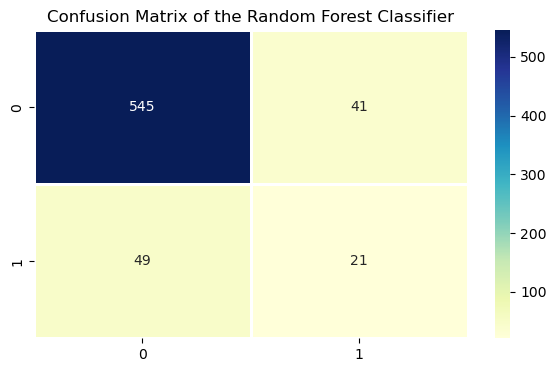

For  Logistic Regression

Accuracy Score -  0.5365853658536586
Precision Score -  0.11258278145695365

Classification Score - 
              precision    recall  f1-score   support

           0       0.90      0.54      0.68       586
           1       0.11      0.49      0.18        70

    accuracy                           0.54       656
   macro avg       0.51      0.51      0.43       656
weighted avg       0.81      0.54      0.62       656


Confusion Matrix
[[318 268]
 [ 36  34]]


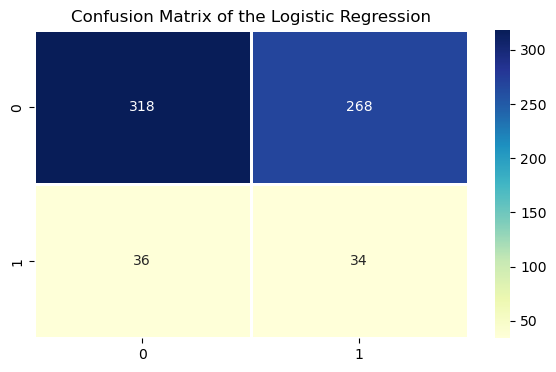

For  XGBoost

Accuracy Score -  0.8246951219512195
Precision Score -  0.2413793103448276

Classification Score - 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       586
           1       0.24      0.30      0.27        70

    accuracy                           0.82       656
   macro avg       0.58      0.59      0.58       656
weighted avg       0.84      0.82      0.83       656


Confusion Matrix
[[520  66]
 [ 49  21]]


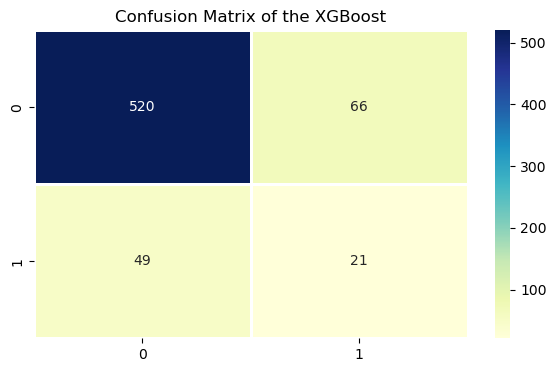

For  KNN

Accuracy Score -  0.6920731707317073
Precision Score -  0.15625

Classification Score - 
              precision    recall  f1-score   support

           0       0.91      0.72      0.81       586
           1       0.16      0.43      0.23        70

    accuracy                           0.69       656
   macro avg       0.54      0.58      0.52       656
weighted avg       0.83      0.69      0.75       656


Confusion Matrix
[[424 162]
 [ 40  30]]


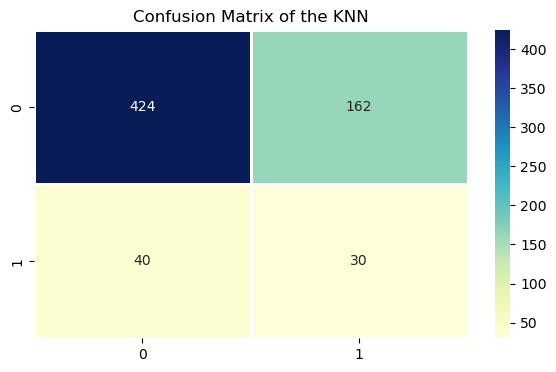

For  Support Vector Classifier

Accuracy Score -  0.4603658536585366
Precision Score -  0.10773480662983426

Classification Score - 
              precision    recall  f1-score   support

           0       0.89      0.45      0.60       586
           1       0.11      0.56      0.18        70

    accuracy                           0.46       656
   macro avg       0.50      0.50      0.39       656
weighted avg       0.81      0.46      0.55       656


Confusion Matrix
[[263 323]
 [ 31  39]]


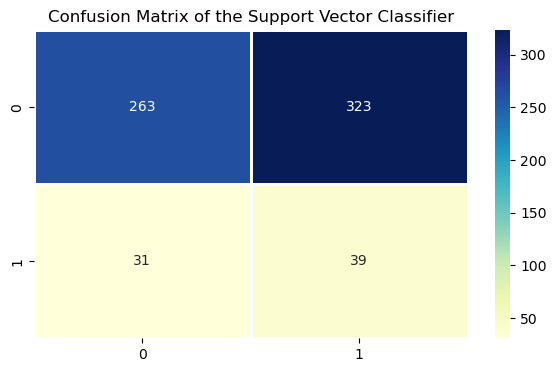

For  Decision Tree Classifier

Accuracy Score -  0.5152439024390244
Precision Score -  0.14367816091954022

Classification Score - 
              precision    recall  f1-score   support

           0       0.94      0.49      0.64       586
           1       0.14      0.71      0.24        70

    accuracy                           0.52       656
   macro avg       0.54      0.60      0.44       656
weighted avg       0.85      0.52      0.60       656


Confusion Matrix
[[288 298]
 [ 20  50]]


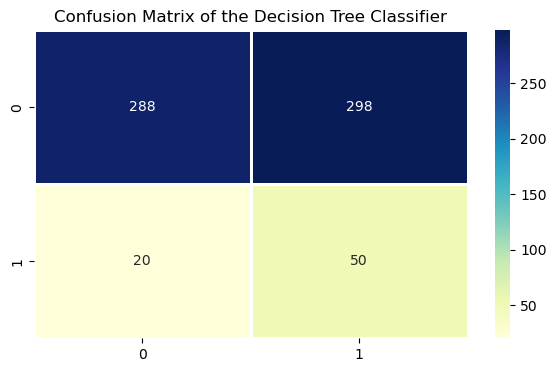

In [82]:
# Now call the function
accuracy_scores = []
precision_scores = []
classification = []
confusion = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_classification,current_confusion = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print()
    print("Accuracy Score - ",current_accuracy)
    print("Precision Score - ",current_precision)
    print()
    print("Classification Score - ")
    print(current_classification)
    print()
    print("Confusion Matrix")
    print(current_confusion)
    plt.figure(figsize=(7,4))
    sns.heatmap(current_confusion, annot=True, cmap="YlGnBu", linewidths=.9, fmt='d')
    plt.title(f'Confusion Matrix of the {name}')
    plt.show()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    classification.append(current_classification)
    confusion.append(current_confusion)

In [63]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Classification Score':classification,'Confusion Matrix': confusion}).sort_values('Precision',ascending=False)
performance_df.head()

Algorithm  Accuracy  Precision  \
0  Random Forest Classifier  0.853659   0.296875   
2                   XGBoost  0.818598   0.266667   
3                       KNN  0.675305   0.147783   
5  Decision Tree Classifier  0.344512   0.129630   
1       Logistic Regression  0.525915   0.122257   

                                Classification Score        Confusion Matrix  
0                precision    recall  f1-score   ...   [[541, 45], [51, 19]]  
2                precision    recall  f1-score   ...   [[509, 77], [42, 28]]  
3                precision    recall  f1-score   ...  [[413, 173], [40, 30]]  
5                precision    recall  f1-score   ...   [[163, 423], [7, 63]]  
1                precision    recall  f1-score   ...  [[306, 280], [31, 39]]

In [43]:
! pip install nbconvert